# Machine Learning Mid-term Project: Question 2
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import datetime
import time
import math

import warnings
warnings.filterwarnings("ignore")

# Import data

In [19]:
df_train = pd.read_csv("../data/train.csv").drop(columns=['id'],axis=1)
df_test = pd.read_csv("../data/test.csv").drop("id",axis=1)

In [20]:
print('train_data rows: ',df_train.shape[0])
print('train_data columns: ',df_train.shape[1])
print()
print('test_transaction rows: ',df_test.shape[0])
print('test_transaction columns: ',df_test.shape[1])

train_data rows:  7905
train_data columns:  19

test_transaction rows:  5271
test_transaction columns:  18


In [21]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316,3.35,172,1601.0,179.80,63,394,9.7,3,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364,3.54,63,1440.0,134.85,88,361,11.0,3,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299,3.55,131,1029.0,119.35,50,199,11.7,4,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256,3.50,58,1653.0,71.30,96,269,10.7,3,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346,3.65,63,1181.0,125.55,96,298,10.6,4,C


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   int64  
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   int64  
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   int64  
 15  Platelets      7905 non-null   int64  
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   int64  
 18  Status  

In [28]:
df_train.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00
mean,2030.17,18373.15,2.59,350.56,3.55,83.90,1816.75,114.60,115.34,265.23,10.63,3.03
std,1094.23,3679.96,3.81,195.38,0.35,75.90,1903.75,48.79,52.53,87.47,0.78,0.87
min,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1230.00,15574.00,0.70,248.00,3.35,39.00,834.00,75.95,84.00,211.00,10.00,2.00
50%,1831.00,18713.00,1.10,298.00,3.58,63.00,1181.00,108.50,104.00,265.00,10.60,3.00
75%,2689.00,20684.00,3.00,390.00,3.77,102.00,1857.00,137.95,139.00,316.00,11.00,4.00
max,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,563.00,18.00,4.00


In [23]:
df_test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5271 non-null   int64  
 1   Drug           5271 non-null   object 
 2   Age            5271 non-null   int64  
 3   Sex            5271 non-null   object 
 4   Ascites        5271 non-null   object 
 5   Hepatomegaly   5271 non-null   object 
 6   Spiders        5271 non-null   object 
 7   Edema          5271 non-null   object 
 8   Bilirubin      5271 non-null   float64
 9   Cholesterol    5271 non-null   float64
 10  Albumin        5271 non-null   float64
 11  Copper         5271 non-null   float64
 12  Alk_Phos       5271 non-null   float64
 13  SGOT           5271 non-null   float64
 14  Tryglicerides  5271 non-null   float64
 15  Platelets      5271 non-null   float64
 16  Prothrombin    5271 non-null   float64
 17  Stage          5271 non-null   float64
dtypes: float

# Target class imbalance

Count of each Status:
C     4965
D     2665
CL     275
Name: Status, dtype: int64



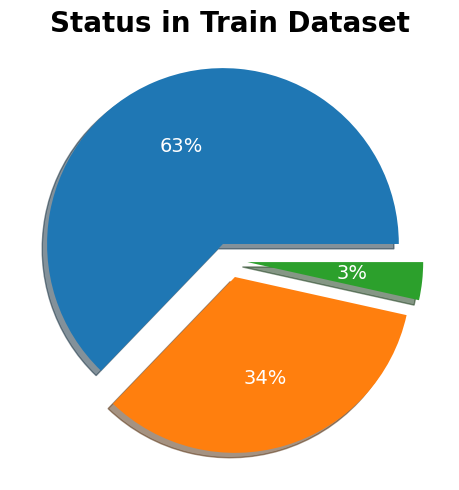

In [26]:
status_counts = df_train['Status'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    df_train['Status'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(df_train['Status'].nunique())],  # Adjust the explode based on the number of unique values
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Status in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Medical defenition of the features
Let us take a look at what each feature indicates:

`N_Days`: Number of days betwqeen registration and the earlier of death, transplantation, or study analysis time in July 1986

`Drug`: Type of drug administered to the patient, with options such as D-penicillamine or Placebo.

`Age`: Age of the patient, indicating the chronological age at the time of data collection.

`Sex`: Gender of the patient, with "F" representing females.

`Ascites`: Presence or absence of ascites, a medical condition characterized by fluid accumulation in the abdomen.

`Hepatomegaly`: Presence or absence of hepatomegaly, an enlargement of the liver.

`Spiders`: Presence or absence of spider angiomas, visible blood vessels in a spider-like pattern on the skin.

`Edema`: Presence or absence of edema, which is swelling caused by the accumulation of excess fluid in body tissues.

`Bilirubin`: Bilirubin levels in the blood, an indicator of liver function.

`Cholesterol`: Cholesterol levels in the blood, a measure of lipid metabolism.

`Albumin`: Albumin levels in the blood, an important protein produced by the liver.

`Copper`: Copper levels, which can be relevant to liver function

`Alk_Phos`: Alkaline phosphatase levels in the blood, an enzyme associated with liver and bone function.

`SGOT`: Serum Glutamic Oxaloacetic Transaminase levels, an enzyme indicating liver health.

`Tryglicerides`: Triglycerides levels in the blood, representing another aspect of lipid metabolism.

`Platelets`: Platelet count in the blood, important for blood clotting.

`Prothrombin`: Prothrombin levels, a key component in the blood clotting process.

`Stage`: Stage of the patient's condition, providing information on the severity or progression of cirrhosis.

In [27]:
df_train.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


The above description of the data will help us when looking at the normal range for each feature as shown below:

### The general medical range for the features
All units match the dataset documentation.

Dataset documentation: https://onlinelibrary.wiley.com/doi/epdf/10.1002/9781118150672.app4

Other unmentioned feature have binary values (Sex, Ascites, Hepatomegaly, Spiders, Edema)

`Bilirubin`: 0.1 to 1.2 mg/dl

`Cholesterol`: Less than 200 mg/dl

`Albumin`: 3.5 to 5.5 gm/dl

`Copper`: 10-30 ug/day

`Alkaline Phosphatase`: 40 to 129 U/litre.

`SGOT` (Serum Glutamic Oxaloacetic Transaminase): 8 to 45 U/L

`Triglycerides`: 48.68 to 168.15 mg/dL

`Platelet`: 150-400 unit

`Prothrombin Time`: 9.4 to 12.5 seconds.

# Checking outliers

# Basic Model

# Ensemble Learing

# Feed Forward Neural Network

# Feed Forward Neural Network